## 3 commonality in previous employers 

In [1]:
import csv
import networkx as nx
import collections

#G = nx.Graph()
G = nx.DiGraph() 

In [2]:
#list persones

listPersones = list()


with open('all_withemploy.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        listPersones.append(row['person'])
        #print(row['person'],row['employer_past'])
listPersones = list(set(listPersones))

In [3]:
# To make dict for every prosecutor like  {name:[emp1,emp2,emp3, ...]}


listEmployers = list()
dictPersoneEmployers = dict()
for name in listPersones:
    listEmployers = list()
    with open('all_withemploy.csv', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['person'] == name:
                #print(row['person'])
                listEmployers.append(row['employer_past'])
                
    dictPersoneEmployers[name]= listEmployers
    #print('\n',name,listEmployers)

In [4]:
#list emmployers 
listEmployers = list()

with open('all_withemploy.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        listEmployers.append(row['employer_past'])
        #print(row['person'],row['employer_past'])
listEmployers = list(set(listEmployers))

In [5]:
#add nodes Employers
dictEmployers = dict()
id = 500
for empl in listEmployers:
    dictEmployers[id]=empl
    G.add_node(id,name = empl, type = 'org', name_empl = empl)
    id+=1

In [6]:
def find_id_node(dictOfWords,SearchStr):
    listOfKeys = [key  for (key, value) in dictOfWords.items() if value == SearchStr]
    return listOfKeys[0]

In [7]:
# add nodes persones & add edges between employers and nodes
id = 0
for k,v in dictPersoneEmployers.items():
    G.add_node(id,name = k)
    for empl in v:
        G.add_edge(id,find_id_node(dictEmployers,empl))
    id +=1
#dictEmployers
#dictPersoneEmployers

In [8]:
#add type for every prosecutors
for node in G.nodes.data():
    if node[0] <400:
        #print(node)
        with open('all_withemploy.csv', newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                if row['person'] == node[1]['name']:
                    G.nodes[node[0]]['type'] = row['source']

In [9]:
# check optional
for n in G.nodes.data():
    if n[1]['type'] == 'justicedept' :
        print(n)

(8, {'name': 'Brian Allen Benczkowski', 'type': 'justicedept'})
(10, {'name': 'Noel Francisco', 'type': 'justicedept'})
(12, {'name': 'Rod J. Rosenstein', 'type': 'justicedept'})
(27, {'name': 'Jeffrey Bossert Clark', 'type': 'justicedept'})
(30, {'name': 'William P. Barr', 'type': 'justicedept'})
(32, {'name': 'Eric S. Dreiband', 'type': 'justicedept'})
(41, {'name': 'Rachel L. Brand', 'type': 'justicedept'})
(46, {'name': 'Stephen Boyd', 'type': 'justicedept'})
(50, {'name': 'John C. Demers', 'type': 'justicedept'})
(66, {'name': 'Jefferson B. Sessions', 'type': 'justicedept'})
(74, {'name': 'Jeffrey A. Rosen', 'type': 'justicedept'})
(76, {'name': 'Makan Delrahim', 'type': 'justicedept'})
(78, {'name': 'Beth Ann Williams', 'type': 'justicedept'})
(84, {'name': 'Joseph H. Hunt', 'type': 'justicedept'})
(91, {'name': 'Steven A. Engel', 'type': 'justicedept'})


In [10]:
#Analise for predecessors 
for node in G.nodes.data():
    G.nodes[node[0]]['predecessors'] = len(list(G.predecessors(node[0])))

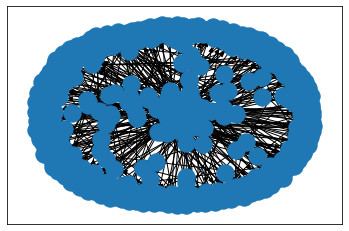

In [11]:
#check net
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos,with_labels=False)

In [12]:
#convert net for Gephi
nx.write_gexf(G, "3_employers.gexf")